In [1]:
import numpy as np
import pandas as pd
import os
import sys
import pickle
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
%matplotlib inline
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:80% !important; }</style>")) 

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

In [6]:
path = 'C:\\Users\\jz3f19\\Downloads\\ml-20m\\ml-20m\\'
ratings = pd.read_csv(path + 'ratings.csv')
ratings.drop('timestamp', axis=1, inplace=True)

In [7]:
movies = pd.read_csv(path + 'movies.csv')

In [8]:
ratings = pd.merge(left = movies, right=ratings, on='movieId', how='right')

In [9]:
ratings

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0
20000260,131258,The Pirates (2014),Adventure,28906,2.5
20000261,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0


In [10]:
popularity = pd.DataFrame(ratings[['userId', 'title', 'movieId']].groupby(['title', 'movieId']).agg(['count']))

In [11]:
popularity.reset_index(inplace=True)

In [12]:
popularity.columns = ['title', 'movieId', 'rating_count']

In [14]:
popularity.sort_values('rating_count', ascending=False, inplace=True)

In [15]:
popularity

,title,movieId,rating_count
18839,Pulp Fiction (1994),296,67310
8726,Forrest Gump (1994),356,66172
20794,"Shawshank Redemption, The (1994)",318,63366
21009,"Silence of the Lambs, The (1991)",593,63299
12657,Jurassic Park (1993),480,59715
...,...,...,...
3008,Bleak Night (2010),118236,1
8716,Forgotten (2012),131070,1
16590,Never Make It Home (2011),113816,1
8712,Forgive Me (2006),129518,1


In [16]:
popularity.query('title == "Primer (2004)"')


,title,movieId,rating_count
18637,Primer (2004),8914,2643


In [17]:
sample_movies = popularity[popularity['title'].isin(["Primer (2004)", "Inception (2010)", "Lord of the Rings: The Fellowship of the Ring, The (2001)"])]

In [18]:
sample_movies

,title,movieId,rating_count
14264,"Lord of the Rings: The Fellowship of the Ring, The (2001)",4993,37553
11834,Inception (2010),79132,14023
18637,Primer (2004),8914,2643


C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 35998 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0, flags=flags)


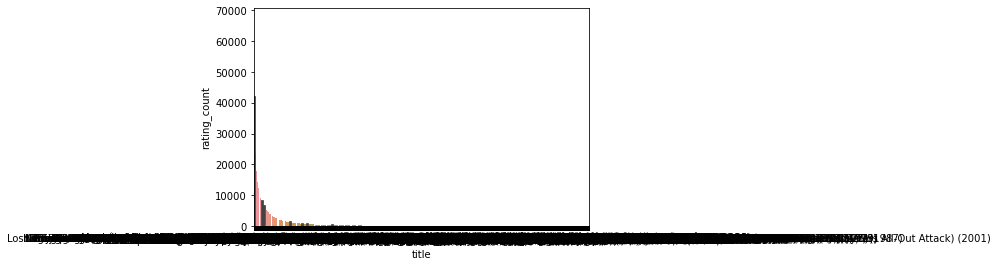

In [21]:
sns.barplot(x=popularity.title, 
            y=popularity.rating_count)


In [23]:
long_tail_data = popularity.copy()
long_tail_data = long_tail_data.sort_values('rating_count', ascending=False)

In [25]:
long_tail_data

,title,movieId,rating_count
18839,Pulp Fiction (1994),296,67310
8726,Forrest Gump (1994),356,66172
20794,"Shawshank Redemption, The (1994)",318,63366
21009,"Silence of the Lambs, The (1991)",593,63299
12657,Jurassic Park (1993),480,59715
...,...,...,...
139,1987 (2014),118884,1
1170,American Samurai (Ninja: American Samurai) (1992),103519,1
1169,American Roulette (1988),98601,1
1167,American Revolutionary: The Evolution of Grace Lee Boggs (2013),113304,1


In [26]:
print(len(long_tail_data.movieId.unique()))

26744


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

long_tail_plot_data = long_tail_data.sample(2000)
long_tail_plot_data = long_tail_plot_data.sort_values('rating_count', ascending=False)


g = sns.catplot(x="title", y="rating_count", data=long_tail_plot_data)
g.set(xticklabels=[])
plt.axvline(x=1949)
plt.show()
g.savefig("long_tail.png")

In [27]:
# sparsity
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique() # how many users and movies

In [28]:
print('sparsity level is {}%'.format(round((1.0 - len(ratings)/float(n_users*n_movies))*100, 4)))

sparsity level is 99.46%


In [33]:
# summarise by movie
movie_summary = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
movie_summary['num_ratings'] = ratings.groupby('movieId')['rating'].count()

#movie_summary['num_ratings'].describe()
movie_summary.head()

,rating,num_ratings
movieId,,
1,3.921240,49695
2,3.211977,22243
3,3.151040,12735
4,2.861393,2756
5,3.064592,12161


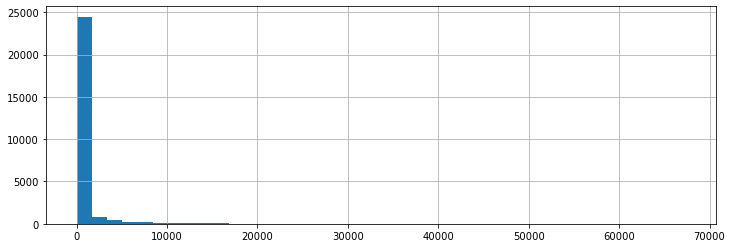

In [34]:
plt.figure(figsize=(12,4))
movie_summary['num_ratings'].hist(bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB390D4438>,
      dtype=object)

<Figure size 864x288 with 0 Axes>

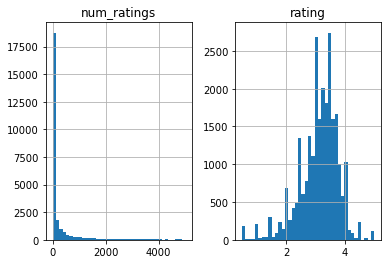

In [39]:
plt.figure(figsize=(12,4))
movie_summary[movie_summary['num_ratings'] < 5000].hist(bins=40)

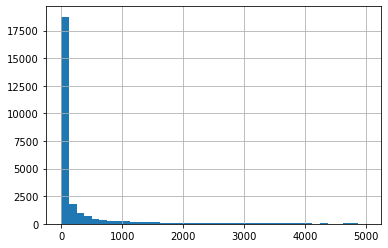

In [40]:
movie_summary[movie_summary['num_ratings'] < 5000]['num_ratings'].hist(bins=40)

In [41]:
(movie_summary['num_ratings'] < 100).sum()# these movie are less than 100 ratings

18198

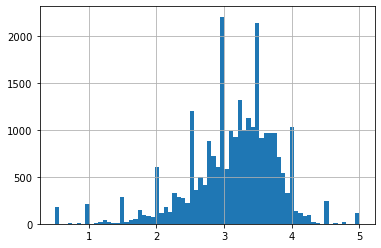

In [42]:
movie_summary['rating'].hist(bins=70)

C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


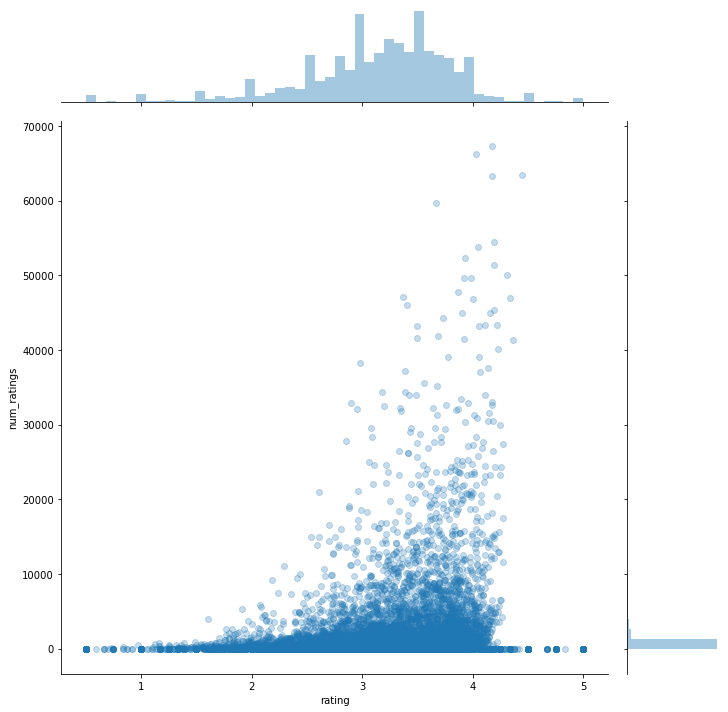

In [43]:
sns.jointplot(x='rating',y='num_ratings',data=movie_summary,alpha=0.25, size=10)

In [70]:
user_summary = pd.DataFrame(ratings.groupby('userId')['rating'].count())

In [71]:
user_summary

,rating
userId,
1,175
2,61
3,187
4,28
5,66
...,...
138489,38
138490,151
138491,22


In [72]:
user_summary.columns

Index(['rating'], dtype='object')

In [60]:
print(['rating_freq'])

['rating_freq']


In [73]:
user_summary.columns = ['rating_freq']

In [74]:
user_summary

,rating_freq
userId,
1,175
2,61
3,187
4,28
5,66
...,...
138489,38
138490,151
138491,22


In [65]:
user_summary['rating_mean'] = ratings.groupby('userId')['rating'].mean()

In [66]:
user_summary.head()

,rating_freq,rating_mean
userId,,
1,175,3.742857
2,61,4.000000
3,187,4.122995
4,28,3.571429
5,66,4.272727


In [67]:
user_summary.describe()

,rating_freq,rating_mean
count,138493.000000,138493.000000
mean,144.413530,3.627209
std,230.267257,0.443030
min,20.000000,0.500000
25%,35.000000,3.369478
50%,68.000000,3.653846
75%,155.000000,3.923077
max,9254.000000,5.000000


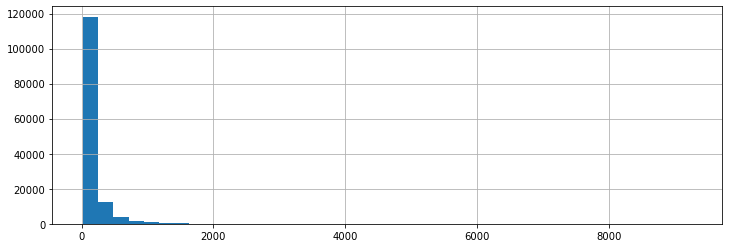

In [52]:

plt.figure(figsize=(12,4))
user_summary['rating_freq'].hist(bins=40)

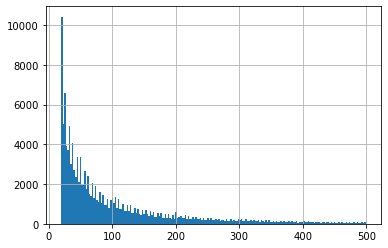

In [62]:
user_summary[user_summary['rating_freq'] < 500]['rating_freq'].hist(bins=200)

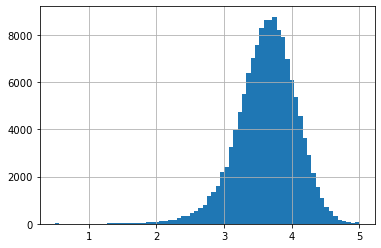

In [68]:
user_summary['rating_mean'].hist(bins=70)

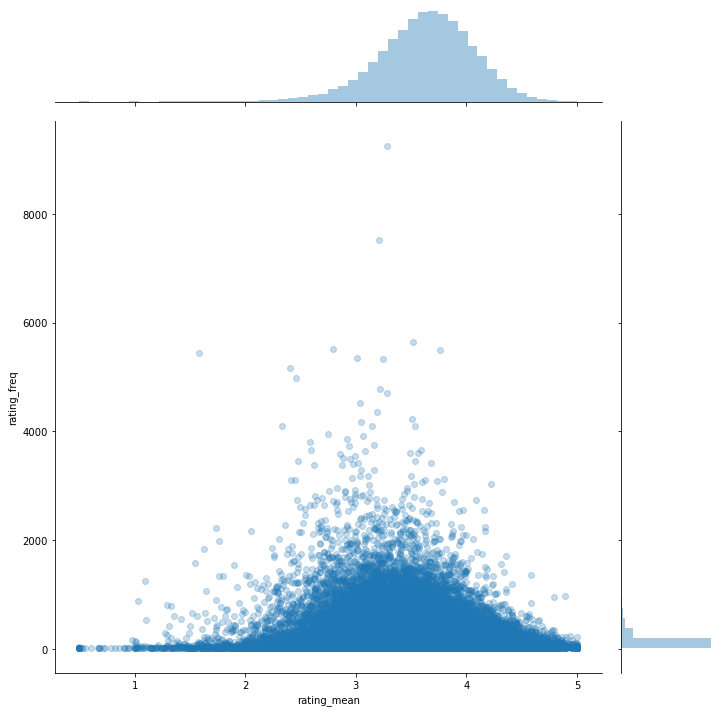

In [69]:
sns.jointplot(x='rating_mean',y='rating_freq',data=user_summary,alpha=0.25, size=10)